In [1]:
# End-to-End Iris Classification with Random Forest in SageMaker Studio Lab

In [2]:
!pip install pandas scikit-learn numpy matplotlib seaborn

In [3]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Step 2: Load and explore Dataset

from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

# View data shape and preview
print("Feature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)
display(X.head())

# Add species names using the target
species_names = pd.Series(y).apply(lambda i: iris.target_names[i])
df = X.copy()
df['species'] = y
df['species_name'] = species_names

# Display unique species and their distribution
print("\nSpecies Distribution:\n", df['species_name'].value_counts())

Feature Matrix Shape: (150, 4)
Target Vector Shape: (150,)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2



Species Distribution:
 species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [5]:
# Step 3: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Step 4: Feature Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Step: Model Training - Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 90.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



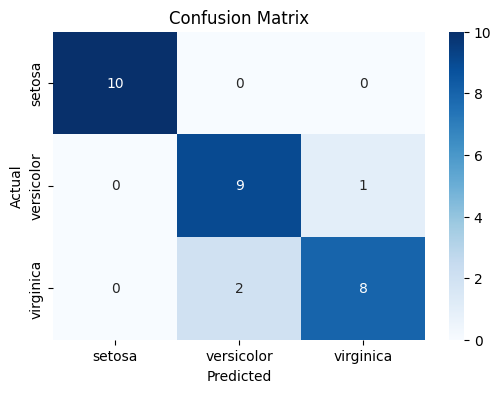

In [8]:
# Step 6: Model Evaluation

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [9]:
# Step 7: Save Model for Deployment (Optional)

joblib.dump(rf_model, "iris_random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")  

['scaler.pkl']